
In this notebook, we will conduct a detailed analysis of airline services, depicting different aspects such as customer satisfaction, punctuality, and amenities. The goal is to provide a comprehensive review and insights to help travelers take effective and proper decisions.


In [4]:
import numpy as np
import pandas as pd 

import os

In [5]:
#pip install vaderSentiment

In [6]:
!pip install missingno
!pip install xgboost
import numpy as np # linear algebra
import pandas as pd
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, precision_score, recall_score, f1_score,accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore",category=Warning)


In [7]:
airline_df = pd.read_csv("Airline_review.csv")

In [8]:
print(airline_df.head())

   Unnamed: 0   Airline Name Overall_Rating  \
0           0    AB Aviation              9   
1           1    AB Aviation              1   
2           2    AB Aviation              1   
3           3  Adria Airways              1   
4           4  Adria Airways              1   

                            Review_Title          Review Date  Verified  \
0                "pretty decent airline"   11th November 2019      True   
1                   "Not a good airline"       25th June 2019      True   
2         "flight was fortunately short"       25th June 2019      True   
3    "I will never fly again with Adria"  28th September 2019     False   
4  "it ruined our last days of holidays"  24th September 2019      True   

                                              Review       Aircraft  \
0    Moroni to Moheli. Turned out to be a pretty ...            NaN   
1   Moroni to Anjouan. It is a very small airline...           E120   
2    Anjouan to Dzaoudzi. A very small airline an... 

In [9]:
# We have 5 steps
# 1. Data Preprocessing
# 2. Feature Engineering
# * Handling Missing Values (Data Cleaning)
# * Functionalization
# 3. Exploratory Data Analysis
# 4. Feature Extraction-Scaling
# * Feature Scaling
# 5. Modelling and Evaluation


# Data Preprocessing

In [10]:
def preprocess(data):
    print(" Shape of data \n")
    print(data.shape)
    
    print(" Info \n")
    print(data.info())
    
    print("\n Null values in data \n")
    print(data.isnull().sum())
    
    print("\n Describe - Object Values \n")
    print(data.describe(include="O").T)
    
    print("\n Describe: Statistics of the data \n")
    print(data.describe().T)

In [11]:
preprocess(airline_df)

 Shape of data 

(23171, 20)
 Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  F

In [12]:
airline_df.head()

Unnamed: 0   Airline Name Overall_Rating  \
0           0    AB Aviation              9   
1           1    AB Aviation              1   
2           2    AB Aviation              1   
3           3  Adria Airways              1   
4           4  Adria Airways              1   

                            Review_Title          Review Date  Verified  \
0                "pretty decent airline"   11th November 2019      True   
1                   "Not a good airline"       25th June 2019      True   
2         "flight was fortunately short"       25th June 2019      True   
3    "I will never fly again with Adria"  28th September 2019     False   
4  "it ruined our last days of holidays"  24th September 2019      True   

                                              Review       Aircraft  \
0    Moroni to Moheli. Turned out to be a pretty ...            NaN   
1   Moroni to Anjouan. It is a very small airline...           E120   
2    Anjouan to Dzaoudzi. A very small airline an...  Embraer E120    
3    Please do a favor yourself and do not fly wi...            NaN   
4   Do not book a flight with this airline! My fr...            NaN   

  Type Of Traveller      Seat Type                             Route  \
0      Solo Leisure  Economy Class                  Moroni to Moheli   
1      Solo Leisure  Economy Class                 Moroni to Anjouan   
2      Solo Leisure  Economy Class               Anjouan to Dzaoudzi   
3      Solo Leisure  Economy Class             Frankfurt to Pristina   
4    Couple Leisure  Economy Class  Sofia to Amsterdam via Ljubljana   

       Date Flown  Seat Comfort  Cabin Staff Service  Food & Beverages  \
0   November 2019           4.0                  5.0               4.0   
1       June 2019           2.0                  2.0               1.0   
2       June 2019           2.0                  1.0               1.0   
3  September 2019           1.0                  1.0               NaN   
4  September 2019           1.0                  1.0               1.0   

   Ground Service  Inflight Entertainment  Wifi & Connectivity  \
0             4.0                     NaN                  NaN   
1             1.0                     NaN                  NaN   
2             1.0                     NaN                  NaN   
3             1.0                     NaN                  NaN   
4             1.0                     1.0                  1.0   

   Value For Money Recommended  
0              3.0         yes  
1              2.0          no  
2              2.0          no  
3              1.0          no  
4              1.0          no

# Feature Engineering

In [13]:
# Rewriting the column name
airline_df.columns = [col.replace(" ", "_").upper() for col in airline_df.columns]

In [14]:
# Deleting irrelevant columns from the dataset
airline_df.drop(["AIRCRAFT","ROUTE","DATE_FLOWN"], axis=1, inplace=True)

In [15]:
# Replacing "n" instead of TEN in 'OVERALL_RATING'
airline_df['OVERALL_RATING'].unique()

array(['9', '1', '8', '2', '3', '5', '6', '7', '4', 'n'], dtype=object)

In [16]:
airline_df['OVERALL_RATING']=airline_df['OVERALL_RATING'].replace('n',10).astype(int)

In [17]:
# Fix 'REVIEW_DATE' format ---> '25th June 2019' and dtype is Object
airline_df['REVIEW_DATE'] = [col.replace("nd","") if "nd" in col else col for col in airline_df['REVIEW_DATE'].values]
airline_df['REVIEW_DATE'] = [col.replace("th","") if "th" in col else col for col in airline_df['REVIEW_DATE'].values]
airline_df['REVIEW_DATE'] = [col.replace("st","") if "st" in col else col for col in airline_df['REVIEW_DATE'].values]
airline_df['REVIEW_DATE'] = [col.replace("rd","") if "rd" in col else col for col in airline_df['REVIEW_DATE'].values]

airline_df['REVIEW_DATE'] = [col.replace("August","Augu") if "August" in col else col for col in airline_df['REVIEW_DATE'].values]
airline_df['REVIEW_DATE'] = [col.replace("Augu","August") if "Augu" in col else col for col in airline_df['REVIEW_DATE'].values]

airline_df['REVIEW_DATE'] = pd.to_datetime(airline_df['REVIEW_DATE'])


In [18]:
# Rating must be between 1 and 5
list_ = ["SEAT_COMFORT","CABIN_STAFF_SERVICE","FOOD_&_BEVERAGES","INFLIGHT_ENTERTAINMENT","WIFI_&_CONNECTIVITY","VALUE_FOR_MONEY"]
for i in range(6):
    print(f"col name: {list_[i]} {airline_df[list_[i]].unique()}")

col name: SEAT_COMFORT [ 4.  2.  1.  3.  5. nan  0.]
col name: CABIN_STAFF_SERVICE [ 5.  2.  1.  4.  3. nan  0.]
col name: FOOD_&_BEVERAGES [ 4.  1. nan  3.  2.  5.  0.]
col name: INFLIGHT_ENTERTAINMENT [nan  1.  4.  5.  3.  2.  0.]
col name: WIFI_&_CONNECTIVITY [nan  1.  5.  3.  4.  2.  0.]
col name: VALUE_FOR_MONEY [ 3.  2.  1.  5.  4. nan  0.]


In [19]:
airline_df["SEAT_COMFORT"] = airline_df["SEAT_COMFORT"].apply(lambda x: x + 1.0 if x == 0.0 else x)
airline_df["CABIN_STAFF_SERVICE"] = airline_df["CABIN_STAFF_SERVICE"].apply(lambda x: x + 1.0 if x == 0.0 else x)
airline_df["FOOD_&_BEVERAGES"] = airline_df["FOOD_&_BEVERAGES"].apply(lambda x: x + 1.0 if x == 0.0 else x)
airline_df["INFLIGHT_ENTERTAINMENT"] = airline_df["INFLIGHT_ENTERTAINMENT"].apply(lambda x: x + 1.0 if x == 0.0 else x)
airline_df["WIFI_&_CONNECTIVITY"] = airline_df["WIFI_&_CONNECTIVITY"].apply(lambda x: x + 1.0 if x == 0.0 else x)
airline_df["VALUE_FOR_MONEY"] = airline_df["VALUE_FOR_MONEY"].apply(lambda x: x + 1.0 if x == 0.0 else x)

In [20]:
#Replacing null values at certain places, for the overall ratings
data2 = airline_df.drop(["UNNAMED:_0","AIRLINE_NAME","REVIEW_TITLE","REVIEW_DATE","VERIFIED","TYPE_OF_TRAVELLER","REVIEW","SEAT_TYPE"],axis=1)
data2 = data2.loc[data2["OVERALL_RATING"]==10]


In [21]:
data2 = data2.drop(data2.dropna(thresh=7).index,axis=0) # invalid
airline_df.drop(data2.loc[data2["OVERALL_RATING"]==10].index,axis=0,inplace=True) # deleting from dataset

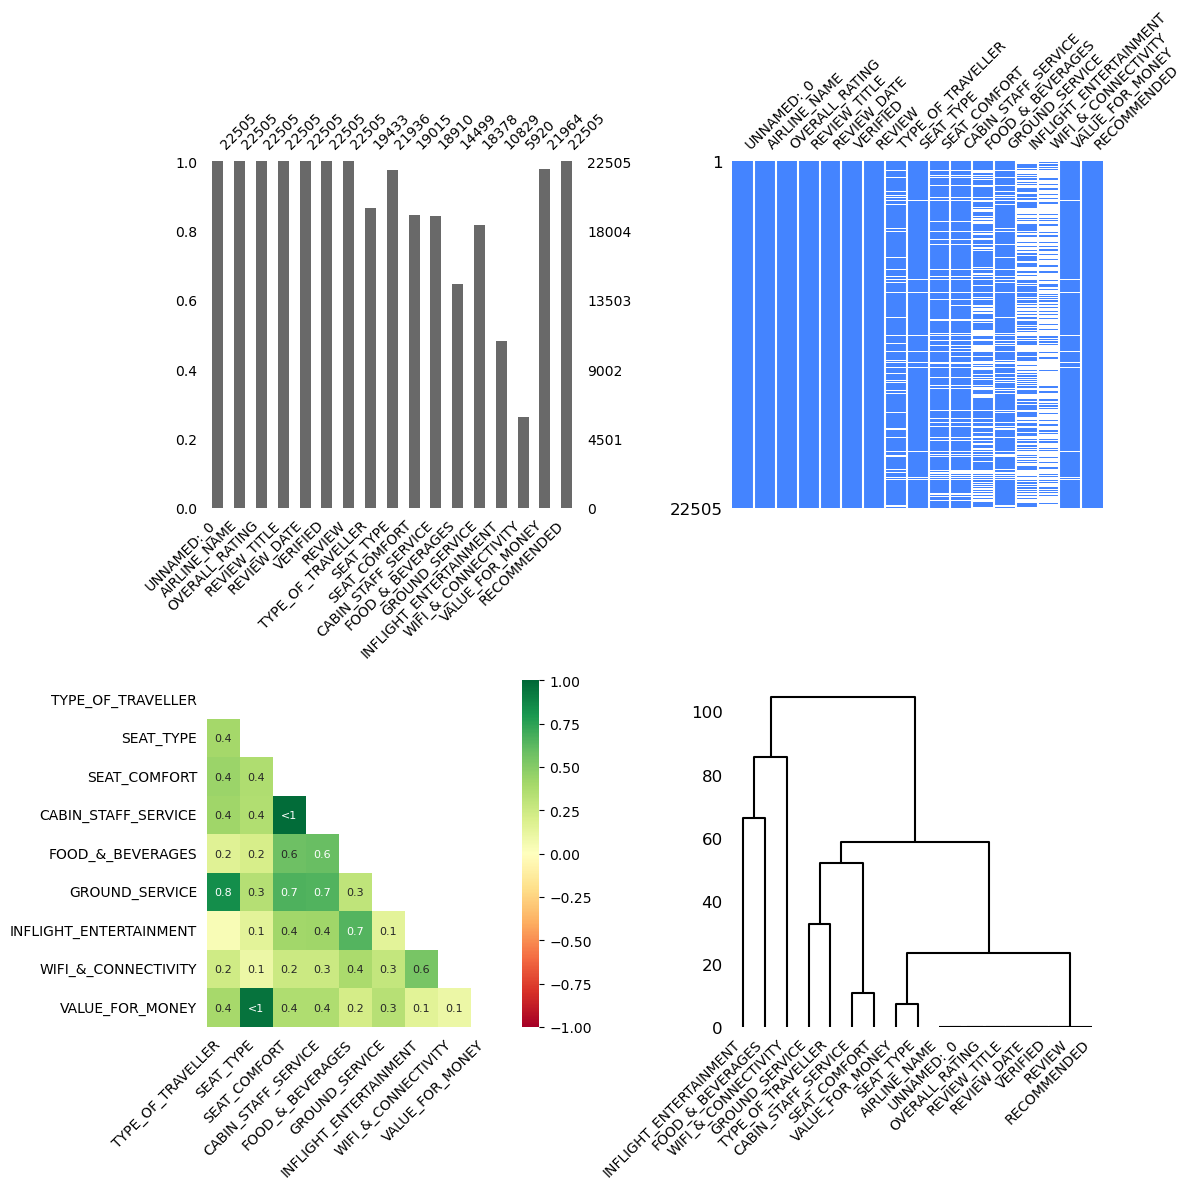

In [22]:
# Missing Data Bar,Matrix,Heatmap,Dendrogram Chart
fig = plt.figure(figsize=(12,12))

axis1 = fig.add_subplot(2,2,1)
msno.bar(airline_df,fontsize=10,figsize=(6,6),ax=axis1)
axis2 = fig.add_subplot(2,2,2)
msno.matrix(airline_df,fontsize=10,figsize=(6,6),color=(0.27, 0.52, 1.0),ax=axis2)
axis3 = fig.add_subplot(2,2,3)
msno.heatmap(airline_df,fontsize=10,figsize=(6,6),cmap="RdYlGn",ax=axis3)
axis4 = fig.add_subplot(2,2,4)
msno.dendrogram(airline_df,fontsize=10,figsize=(6,6),orientation="top",ax=axis4)

plt.tight_layout()

# Handling Missing Values

In [23]:
airline_df.isnull().sum()

UNNAMED:_0                    0
AIRLINE_NAME                  0
OVERALL_RATING                0
REVIEW_TITLE                  0
REVIEW_DATE                   0
VERIFIED                      0
REVIEW                        0
TYPE_OF_TRAVELLER          3072
SEAT_TYPE                   569
SEAT_COMFORT               3490
CABIN_STAFF_SERVICE        3595
FOOD_&_BEVERAGES           8006
GROUND_SERVICE             4127
INFLIGHT_ENTERTAINMENT    11676
WIFI_&_CONNECTIVITY       16585
VALUE_FOR_MONEY             541
RECOMMENDED                   0
dtype: int64

In [24]:
# Fill missing values for the type_of_traveller
airline_df['TYPE_OF_TRAVELLER'] = airline_df['TYPE_OF_TRAVELLER'].fillna(method='ffill')


In [25]:
# Fill missing values for the seat_type
airline_df['SEAT_TYPE'] = airline_df['SEAT_TYPE'].fillna(method='ffill')


In [26]:
# SEAT_COMFORT --Nan values
mean_imputer = SimpleImputer(strategy='most_frequent')
airline_df["SEAT_COMFORT"] = mean_imputer.fit_transform(airline_df[["SEAT_COMFORT"]])

In [27]:
# Filling the values
list2_ = airline_df.loc[:, airline_df.isnull().any()].columns # column names that have NaN values
for i in range(6):
    airline_df[list2_[i]] = airline_df[list2_[i]].fillna(method='ffill')

In [28]:
airline_df.isnull().sum()
airline_df[["INFLIGHT_ENTERTAINMENT","WIFI_&_CONNECTIVITY"]].head()

INFLIGHT_ENTERTAINMENT  WIFI_&_CONNECTIVITY
0                     NaN                  NaN
1                     NaN                  NaN
2                     NaN                  NaN
3                     NaN                  NaN
4                     1.0                  1.0

In [29]:
for i in range(4):
    airline_df['INFLIGHT_ENTERTAINMENT'].iloc[i:i+1, ].fillna(round(airline_df.iloc[i:i+1, [9, 10, 11, 12, 15]].values[0].mean()),inplace=True)
    airline_df['WIFI_&_CONNECTIVITY'].iloc[i:i+1,].fillna(round(airline_df.iloc[i:i+1,[9, 10, 11, 12, 15]].values[0].mean()),inplace=True)

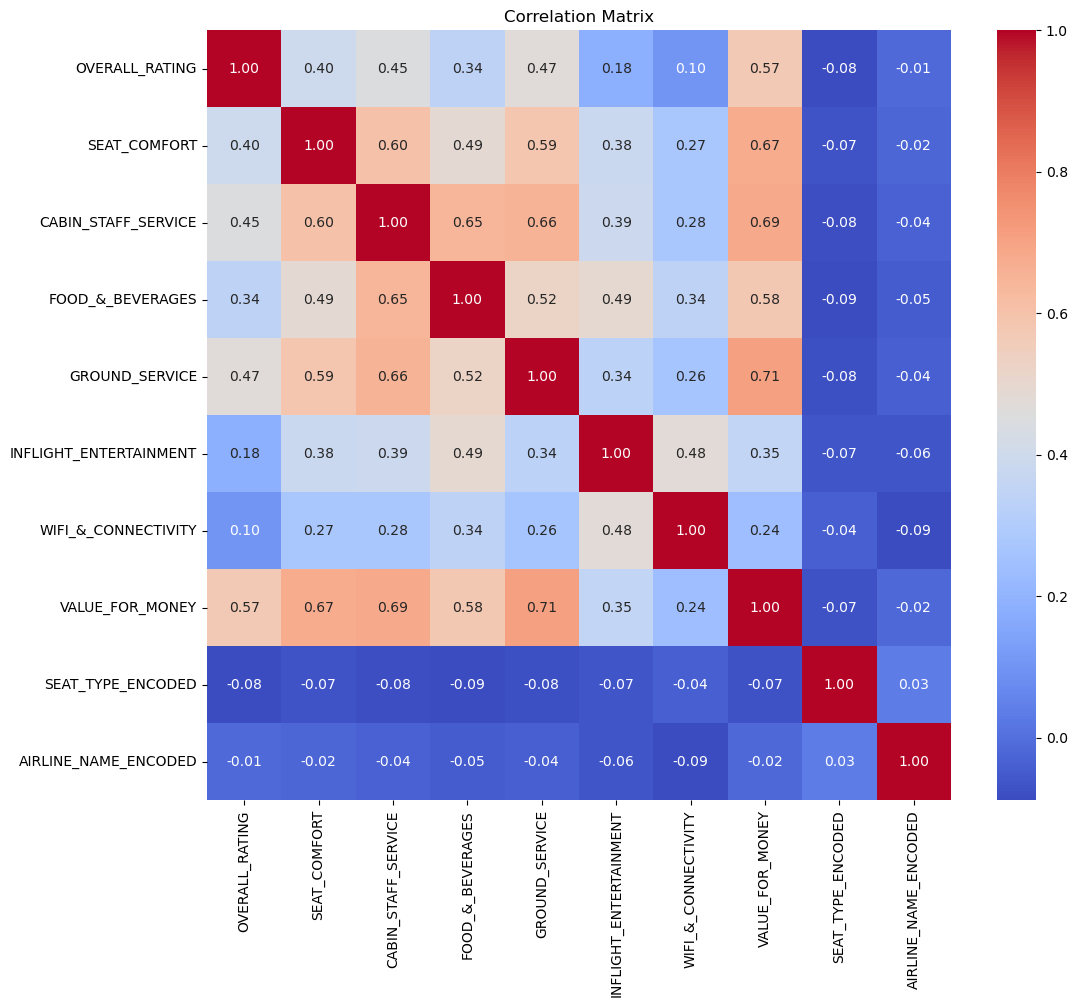

In [30]:
# Correlation matrix 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Select the columns you want to include in the correlation matrix
correlation_cols = ['OVERALL_RATING', 'TYPE_OF_TRAVELLER', 'SEAT_TYPE',
       'SEAT_COMFORT', 'CABIN_STAFF_SERVICE', 'FOOD_&_BEVERAGES',
       'GROUND_SERVICE', 'INFLIGHT_ENTERTAINMENT', 'WIFI_&_CONNECTIVITY',
       'VALUE_FOR_MONEY', 'RECOMMENDED']

# Encode categorical variables
label_encoder = LabelEncoder()
airline_df['SEAT_TYPE_ENCODED'] = label_encoder.fit_transform(airline_df['SEAT_TYPE'])
airline_df['AIRLINE_NAME_ENCODED'] = label_encoder.fit_transform(airline_df['AIRLINE_NAME'])


# Add the encoded seat type to the list of columns
correlation_cols.append('SEAT_TYPE_ENCODED')
correlation_cols.append('AIRLINE_NAME_ENCODED')


# Compute the correlation matrix
correlation_matrix = airline_df[correlation_cols].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [31]:
airline_df.to_csv("cleaned_air_dataset.csv", index=False)

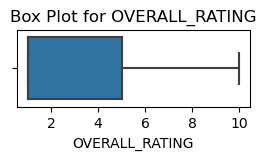

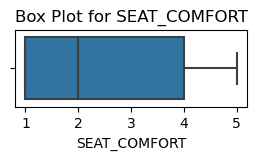

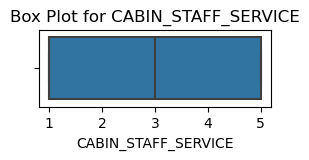

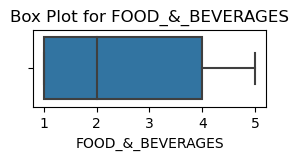

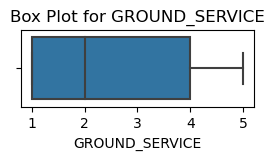

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for outlier detection
numerical_columns = ['OVERALL_RATING', 'SEAT_COMFORT', 'CABIN_STAFF_SERVICE', 'FOOD_&_BEVERAGES', 'GROUND_SERVICE']

# Box plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(3, 1))
    sns.boxplot(x=airline_df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()


The above correlation matrix indicates that the rating is interdependent on factors like value_for_money, cabin_staff_service and Ground_Service

# Exploratory Data Analysis

In [33]:
# Check the column names in your DataFrame
print(airline_df.columns)


Index(['UNNAMED:_0', 'AIRLINE_NAME', 'OVERALL_RATING', 'REVIEW_TITLE',
       'REVIEW_DATE', 'VERIFIED', 'REVIEW', 'TYPE_OF_TRAVELLER', 'SEAT_TYPE',
       'SEAT_COMFORT', 'CABIN_STAFF_SERVICE', 'FOOD_&_BEVERAGES',
       'GROUND_SERVICE', 'INFLIGHT_ENTERTAINMENT', 'WIFI_&_CONNECTIVITY',
       'VALUE_FOR_MONEY', 'RECOMMENDED', 'SEAT_TYPE_ENCODED',
       'AIRLINE_NAME_ENCODED'],
      dtype='object')


In [34]:
airline_df.AIRLINE_NAME.nunique()

497

Which year has the highest number of reviews provided?

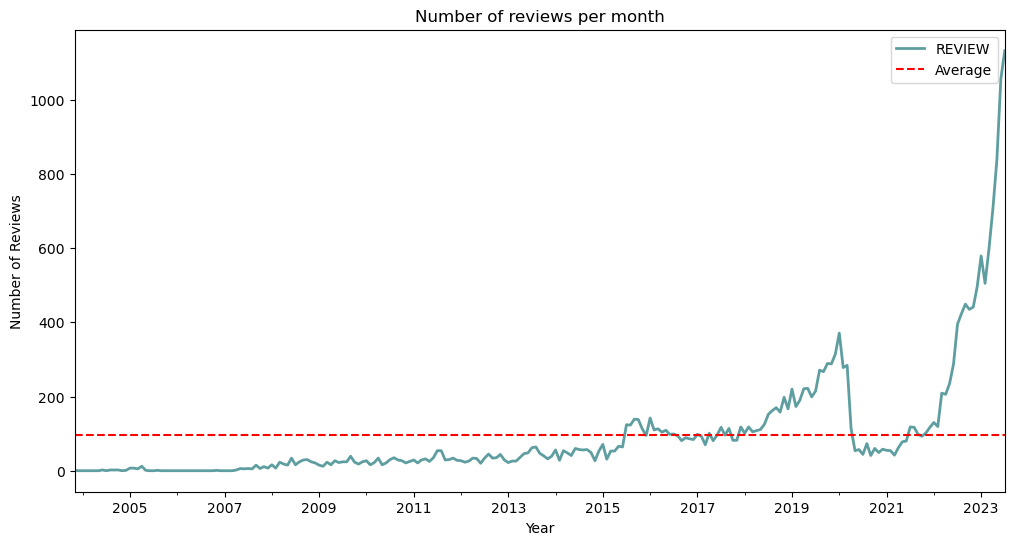

In [35]:
# Frequency of reviews based on year

rev_month = airline_df.resample('M', on='REVIEW_DATE').count()['REVIEW']
avg_rev = rev_month.mean()
plt.figure(figsize=(12, 6))
rev_month.plot(linewidth=2, color='cadetblue')

plt.axhline(y=avg_rev, color='red', linestyle='--', label='Average')
plt.title('Number of reviews per month')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

From the above graph, we can say that the year 2023 has more number of reviews and 2020 being the next highest reviews received by airlines.

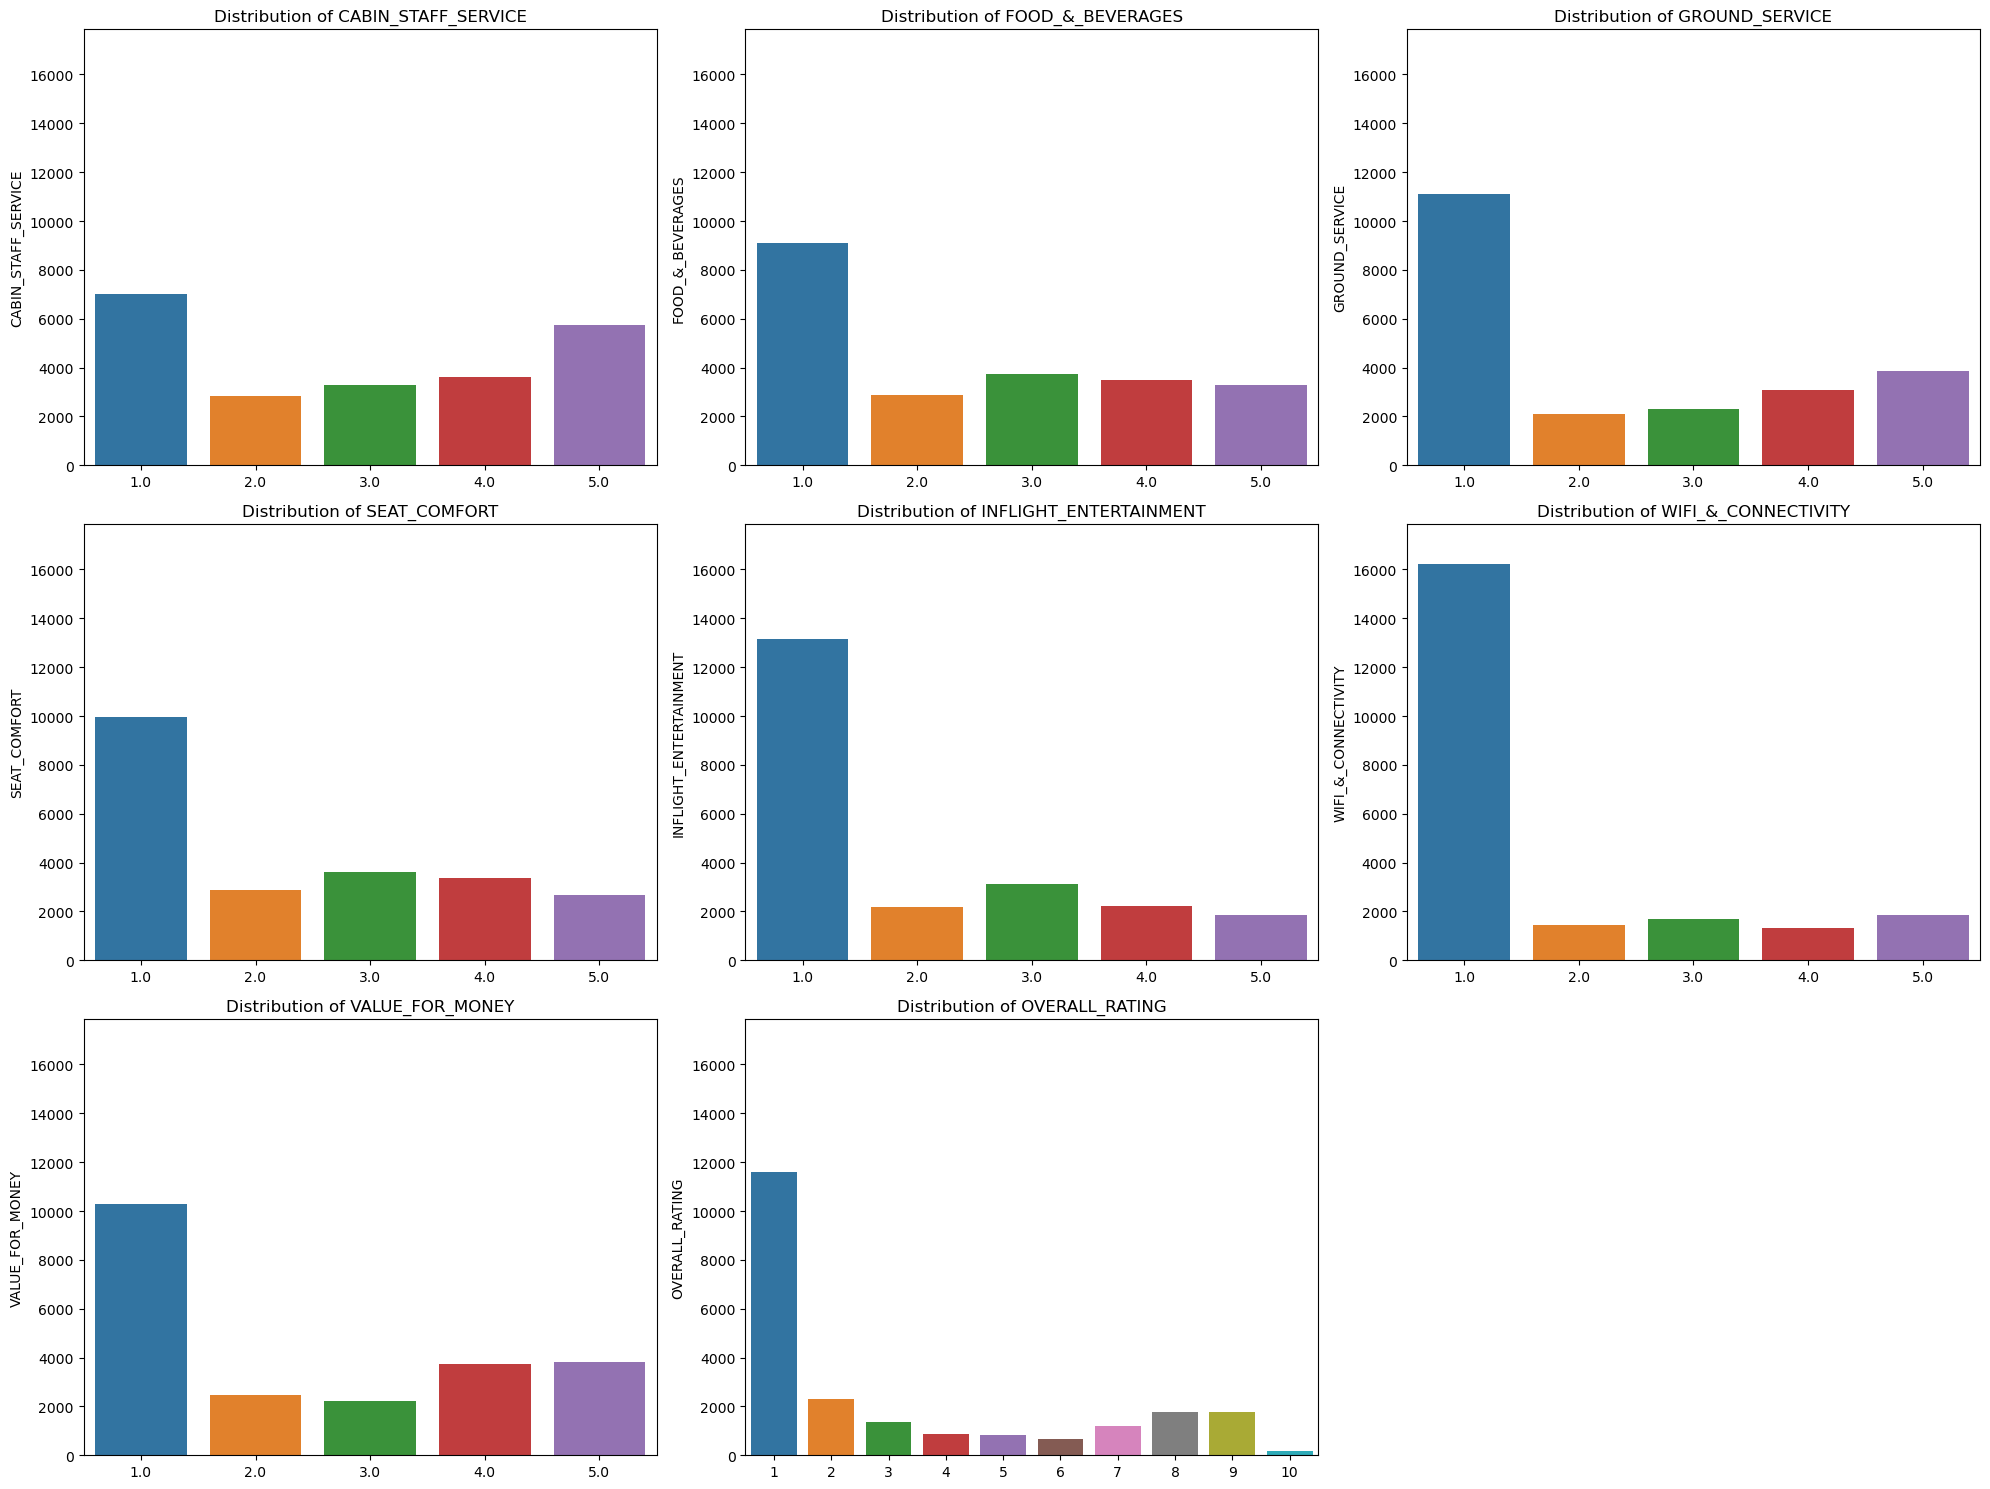

In [36]:
# Checking for the various numerical attributes and ratings


ratings_columns = ['CABIN_STAFF_SERVICE', 'FOOD_&_BEVERAGES', 'GROUND_SERVICE', 'SEAT_COMFORT',
                   'INFLIGHT_ENTERTAINMENT', 'WIFI_&_CONNECTIVITY', 'VALUE_FOR_MONEY', 'OVERALL_RATING']

# Use the ratings_columns to visualize the distribution of each rating
num_rows = 3
num_cols = 3
total_plots = num_rows * num_cols

# Create the subplots and axes objects
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Iterate over each numeric column and create bar plots
mcount = 0  
for i, column in enumerate(ratings_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    counts = airline_df[column].value_counts()
    mcount = max(mcount, counts.max())  # Update the maximum count value
    sns.barplot(x=counts.index, y=counts, ax=ax)
    ax.set_title(f'Distribution of {column}')

# Set the same y-axis limits for each subplot
for ax in axes.flat:
    ax.set_ylim(0, mcount * 1.1)

# Remove any unused subplots
if i + 1 < total_plots:
    for j in range(i + 1, total_plots):
        row = j // num_cols
        col = j % num_cols
        fig.delaxes(axes[row, col])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

What type of travellers are commuting usually?


In [37]:

airline_df['TYPE_OF_TRAVELLER'].unique().tolist()

['Solo Leisure', 'Couple Leisure', 'Business', 'Family Leisure']

In [38]:
import plotly.express as px

fig = px.histogram(airline_df.dropna(subset=['TYPE_OF_TRAVELLER']), x='TYPE_OF_TRAVELLER', title='Distribution of Types of Travelers')

fig.update_layout(
    autosize=False,
    width=600,
    height=500
)

fig.show()


From the given graph, we can see that the largest number of reviews are given by solo leisure traveller type, followed by couple leisure. This also shows the least number is mentioned by business travellers.

How well recommended are the top 10 airlines ?

In [39]:
# Get the top 10 airline names based on count
top_airlines = airline_df['AIRLINE_NAME'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 airlines
filtered_df = airline_df[airline_df['AIRLINE_NAME'].isin(top_airlines)]

# Create the histogram
fig = px.histogram(filtered_df, x="AIRLINE_NAME", color='RECOMMENDED', title='Recommendations For Top 10 Most Reviewed Airlines', barmode='group', height=600)
fig.update_layout(
    yaxis_title="Number of Yes/No Recomendations",
    )
# Set the tick mode for x-axis
fig.update_xaxes(tickmode='linear')

# Show the plot
fig.show()

Among all the airlines, the China Southern Airlines is highly recommended and is said to have more positive reviews. While Condor and Copa airlines are said to be less recommended and have more negative reviews.

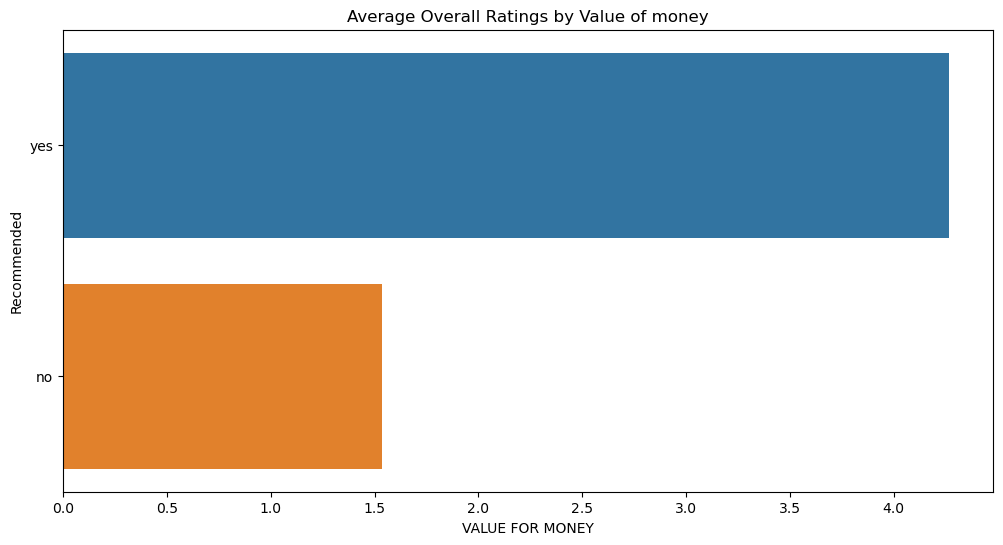

In [40]:
# Value for money Vs. Recommendations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for average ratings of different seat types
plt.figure(figsize=(12, 6))

# Assuming 'value_for_money' is the column
sns.barplot(x='VALUE_FOR_MONEY', y='RECOMMENDED', data=airline_df, ci=None)  # ci=None disables confidence intervals

plt.title('Average Overall Ratings by Value of money')
plt.xlabel('VALUE FOR MONEY')
plt.ylabel('Recommended')

plt.show()


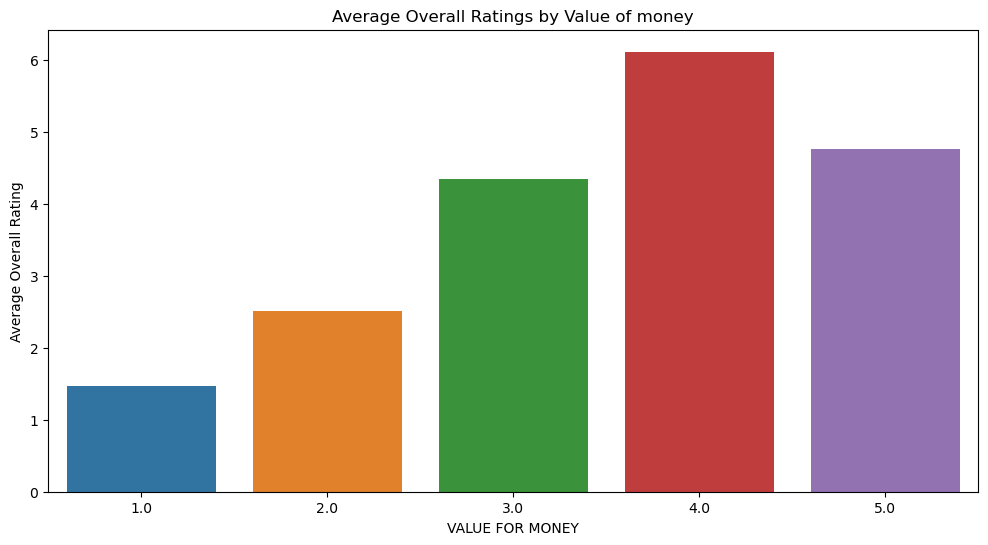

In [41]:
#Rating Vs. Value for money

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for average ratings of different seat types
plt.figure(figsize=(12, 6))

# Assuming 'value_for_money' is the column
sns.barplot(x='VALUE_FOR_MONEY', y='OVERALL_RATING', data=airline_df, ci=None)  # ci=None disables confidence intervals

plt.title('Average Overall Ratings by Value of money')
plt.xlabel('VALUE FOR MONEY')
plt.ylabel('Average Overall Rating')

plt.show()


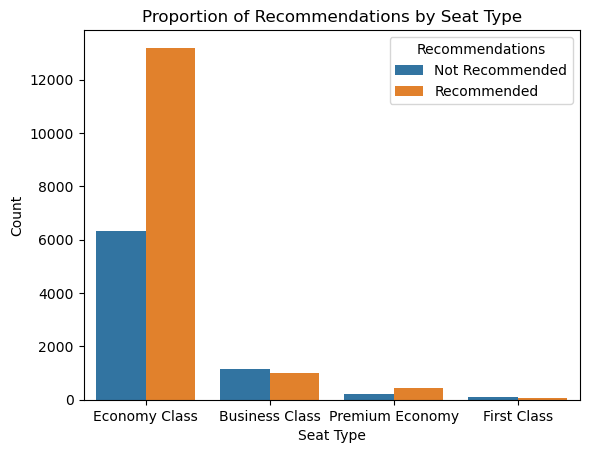

In [42]:
# Seat_type Vs. Recommendation
sns.countplot(x='SEAT_TYPE', hue='RECOMMENDED', data=airline_df)

plt.title('Proportion of Recommendations by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.legend(title='Recommendations', labels=['Not Recommended', 'Recommended'])

plt.show()


In [43]:
# Creating a new column with the NPS profile of each client, to facilitate calculating NPS
def define_profile(score):
    if score <= 6:
        return 'Dissatisfied'
    elif score <= 8:
        return 'Neutral'
    else:
        return 'Satisfied'

airline_df['PROFILE'] = airline_df['OVERALL_RATING'].apply(define_profile)

#Percentage of Profiles by Seat Type

In [44]:
# Calculating the % of each profile by SEAT_TYPE
profile_percentage = airline_df.groupby(['SEAT_TYPE', 'PROFILE']).size() / airline_df.groupby('SEAT_TYPE').size() * 100
profile_percentage = profile_percentage.unstack().fillna(0)

In [45]:
# Defining colors for profiles
colors = {'Satisfied': 'blue', 'Neutral': 'brown', 'Dissatisfied': 'red'}

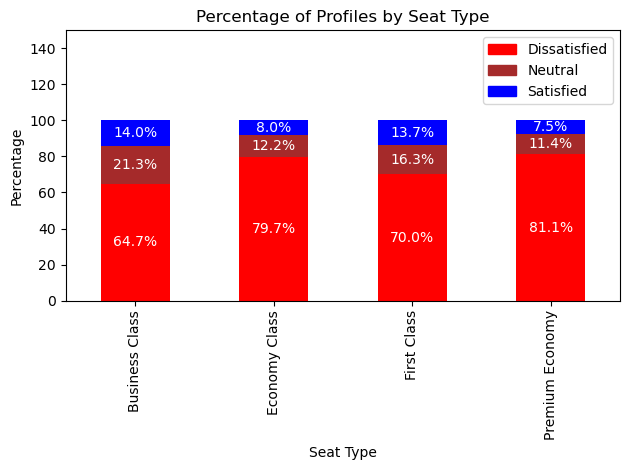

In [46]:
# Ploting the bar chart
ax = profile_percentage.plot(kind='bar', stacked=True, color=[colors[col] for col in profile_percentage.columns])

plt.xlabel('Seat Type')
plt.ylabel('Percentage')
plt.title('Percentage of Profiles by Seat Type')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels], labels=labels)

# Adding labels with percentage values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='white')


plt.ylim(0, 150)
plt.tight_layout()
plt.show()

NPS over time

In [47]:
# Information of review date
airline_df['YEAR'] = (airline_df['REVIEW_DATE']).dt.year

In [48]:
# Economy Class
enomy = airline_df[airline_df['SEAT_TYPE'] == 'Economy Class']
enomy = enomy.groupby(['YEAR','PROFILE'])['UNNAMED:_0'].count()
enomy = enomy.unstack()
enomy['TOTAL'] = enomy.sum(axis=1)
enomy['NPS'] = (enomy['Satisfied']/enomy['TOTAL'] - enomy['Dissatisfied']/enomy['TOTAL'])*100
enomy = enomy.drop(columns = ['Dissatisfied','Neutral','Satisfied','TOTAL'])
enomy.reset_index(inplace=True)

# Business Class
busi = airline_df[airline_df['SEAT_TYPE'] == 'Business Class']
busi = busi.groupby(['YEAR','PROFILE'])['UNNAMED:_0'].count()
busi = busi.unstack()
busi['TOTAL'] = busi.sum(axis=1)
busi['NPS'] = (busi['Satisfied']/busi['TOTAL'] - busi['Dissatisfied']/busi['TOTAL'])*100
busi = busi.drop(columns = ['Dissatisfied','Neutral','Satisfied','TOTAL'])
busi.reset_index(inplace=True)

# Premium Economy
pre_eco = airline_df[airline_df['SEAT_TYPE'] == 'Premium Economy']
pre_eco = pre_eco.groupby(['YEAR','PROFILE'])['UNNAMED:_0'].count()
pre_eco = pre_eco.unstack()
pre_eco['TOTAL'] = pre_eco.sum(axis=1)
pre_eco['NPS'] = (pre_eco['Satisfied']/pre_eco['TOTAL'] - pre_eco['Dissatisfied']/pre_eco['TOTAL'])*100
pre_eco = pre_eco.drop(columns = ['Dissatisfied','Neutral','Satisfied','TOTAL'])
pre_eco.reset_index(inplace=True)

# First Class
fir_cl = airline_df[airline_df['SEAT_TYPE'] == 'First Class']
fir_cl = fir_cl.groupby(['YEAR','PROFILE'])['UNNAMED:_0'].count()
fir_cl = fir_cl.unstack()
fir_cl['TOTAL'] = fir_cl.sum(axis=1)
fir_cl['NPS'] = (fir_cl['Satisfied']/fir_cl['TOTAL'] - fir_cl['Dissatisfied']/fir_cl['TOTAL'])*100
fir_cl = fir_cl.drop(columns = ['Dissatisfied','Neutral','Satisfied','TOTAL'])
fir_cl.reset_index(inplace=True)

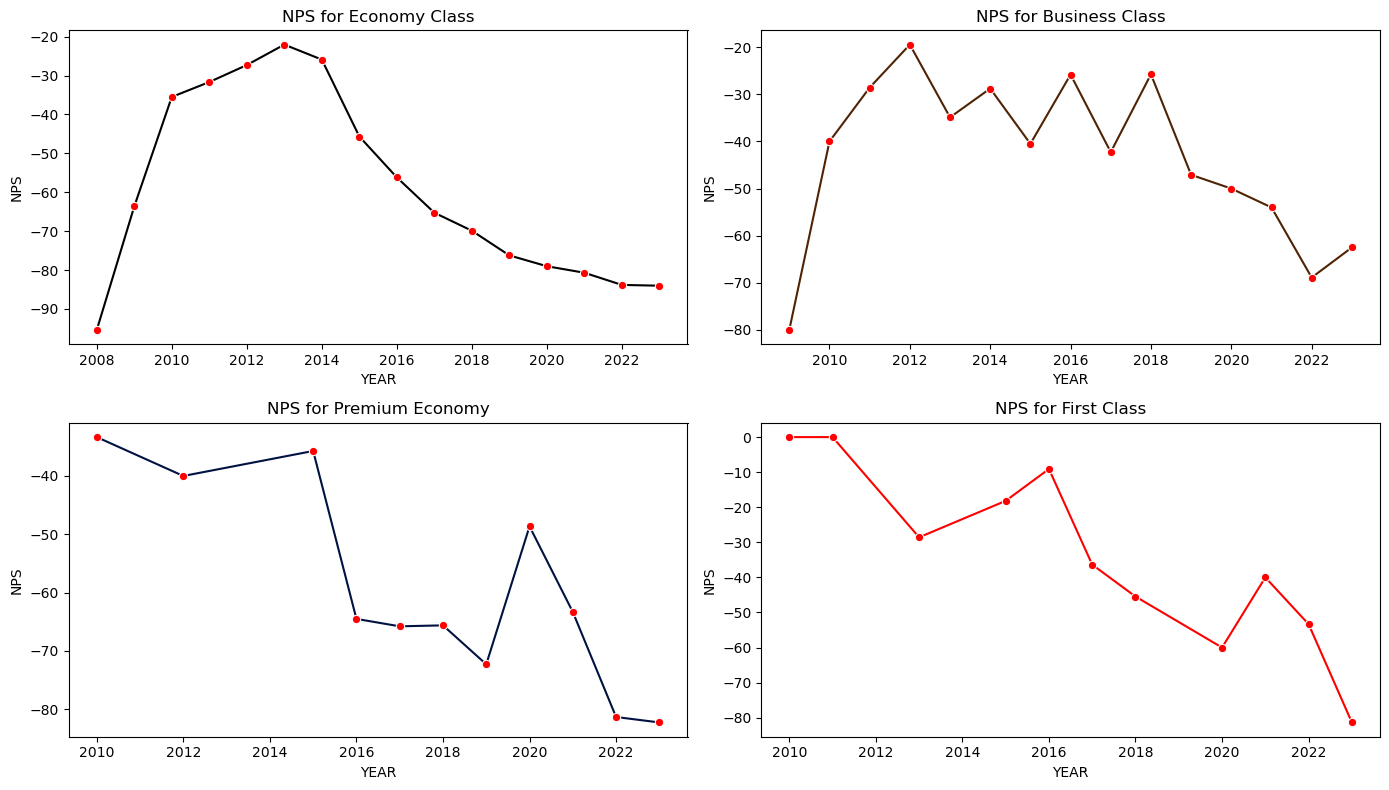

In [49]:
#Plotting
fig, axs = plt.subplots(2,2,figsize=(14,8))

sns.lineplot(x='YEAR',y='NPS',color='black',marker='o',markerfacecolor='red', markersize=6,data=enomy,ax=axs[0][0])
axs[0][0].set_title('NPS for Economy Class')
sns.lineplot(x='YEAR',y='NPS',color='#4F2303',marker='o',markerfacecolor='red', markersize=6,data=busi,ax=axs[0][1])
axs[0][1].set_title('NPS for Business Class')
sns.lineplot(x='YEAR',y='NPS',color='#001241',marker='o',markerfacecolor='red', markersize=6,data=pre_eco,ax=axs[1][0])
axs[1][0].set_title('NPS for Premium Economy')
sns.lineplot(x='YEAR',y='NPS',color='red',marker='o',markerfacecolor='red', markersize=6,data=fir_cl,ax=axs[1][1])
axs[1][1].set_title('NPS for First Class')
plt.tight_layout()

# Feature Extraction-Scaling

Sentiment analysis, or opinion mining, is an application of natural language processing that focuses on identifying and categorizing the sentiment conveyed in textual content. The objective is to automatically classify the expressed emotion as positive, negative, or neutral, providing a computational means to analyze subjective information in written forms, such as customer feedback, social media posts, and other text-based data.

In [50]:
sent_analy = SentimentIntensityAnalyzer()

In [51]:
def analysis_of_sent(text):
    scores_senti = sent_analy.polarity_scores(text)['compound']
    if scores_senti >= 0.05:
        return "Positive"
    elif scores_senti <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [52]:
# Applying sentiment analysis to the airline dataFrame
airline_df['STMNT_REVIEW_TITLE'] = airline_df['REVIEW_TITLE'].apply(analysis_of_sent)
airline_df['STMNT_REVIEW'] = airline_df['REVIEW'].apply(analysis_of_sent)

# Feature Scaling

## Encoding

In [53]:
# One-Hot Encoding
airline_df = pd.get_dummies(airline_df,columns=["STMNT_REVIEW_TITLE","STMNT_REVIEW","TYPE_OF_TRAVELLER","SEAT_TYPE"],drop_first=True,dtype=int)
# Label encoding for target variable
le = LabelEncoder()
airline_df["RECOMMENDED"] = le.fit_transform(airline_df["RECOMMENDED"])
le.inverse_transform([0,1]) # ['no', 'yes'] - [0,1]

array(['no', 'yes'], dtype=object)

# Modelling

In [54]:
# Random Forest Regressor

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 'OVERALL_RATING' is the target variable
features = airline_df[['STMNT_REVIEW_TITLE_Positive','STMNT_REVIEW_Positive','SEAT_COMFORT', 'CABIN_STAFF_SERVICE', 'FOOD_&_BEVERAGES', 'GROUND_SERVICE', 'INFLIGHT_ENTERTAINMENT', 'WIFI_&_CONNECTIVITY', 'VALUE_FOR_MONEY', 'RECOMMENDED']]
target = airline_df['OVERALL_RATING']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


# Printing evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared: {r2:.2f}')


# Print both actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df)


Mean Absolute Error (MAE): 1.28
Mean Squared Error (MSE): 4.38
Root Mean Squared Error (RMSE): 2.09
R-squared: 0.50
       Actual  Predicted
18188       1   1.172796
3485        8   7.034667
9533        9   5.355841
2329        1   6.740889
21845       2   3.160333
...       ...        ...
17828       3   2.228000
3386        1   1.004691
20671       1   1.172796
19793       4   4.231364
6587        1   1.700000

[4501 rows x 2 columns]


Mean Absolute Error (MAE): 1.28
Mean Squared Error (MSE): 5.41
Root Mean Squared Error (RMSE): 2.09
R-squared: 0.38
       Actual  Predicted
18188       1   1.338137
3485        8   6.333333
9533        9   4.878049
2329        1   6.100000
21845       2   3.000000
...       ...        ...
17828       3   2.250000
3386        1   1.327869
20671       1   1.338137
19793       4   5.000000
6587        1   3.000000

[4501 rows x 2 columns]


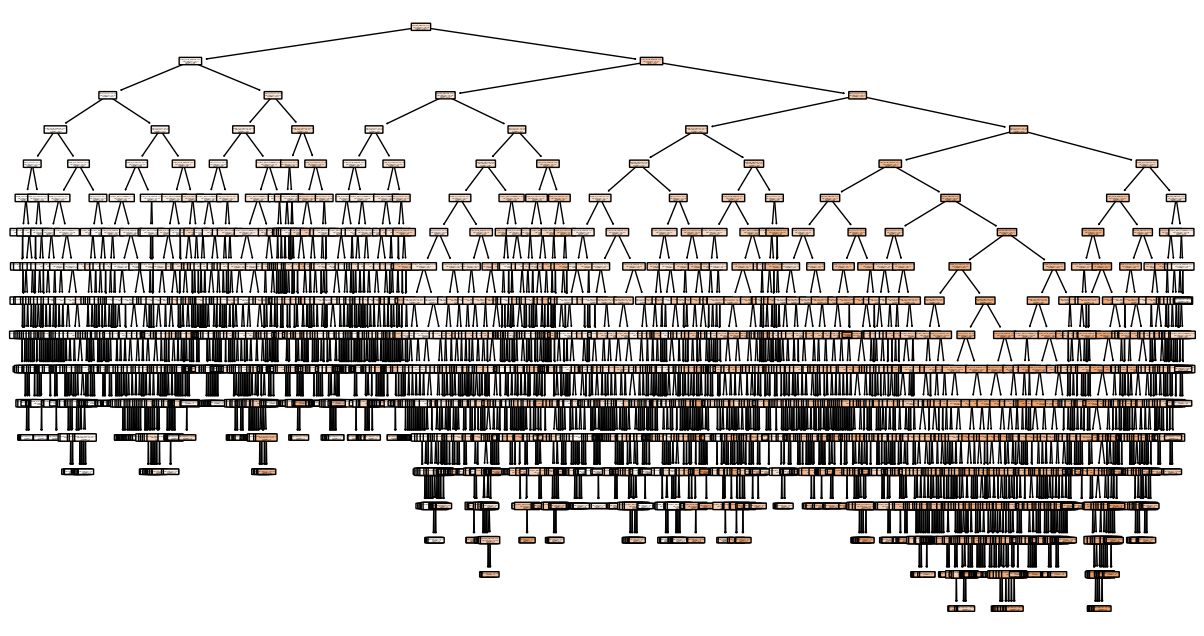

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree


# Select relevant features and target variable
X = airline_df[['SEAT_COMFORT', 'CABIN_STAFF_SERVICE', 'FOOD_&_BEVERAGES', 'GROUND_SERVICE', 'INFLIGHT_ENTERTAINMENT']]
y = airline_df['OVERALL_RATING']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared: {r2:.2f}')


# Print both actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df)


# Visualize the Decision Tree
plt.figure(figsize=(15, 8))
tree.plot_tree(dt_regressor, feature_names=X.columns.tolist(), filled=True, rounded=True)
plt.show()


Mean Absolute Error (MAE): 1.28
Mean Squared Error (MSE): 5.41
Root Mean Squared Error (RMSE): 2.35
R-squared: 0.36
       Actual  Predicted
18188       1        1.4
3485        8        7.4
9533        9        5.2
2329        1        6.8
21845       2        3.0
...       ...        ...
17828       3        2.6
3386        1        1.0
20671       1        1.4
19793       4        4.8
6587        1        5.6

[4501 rows x 2 columns]


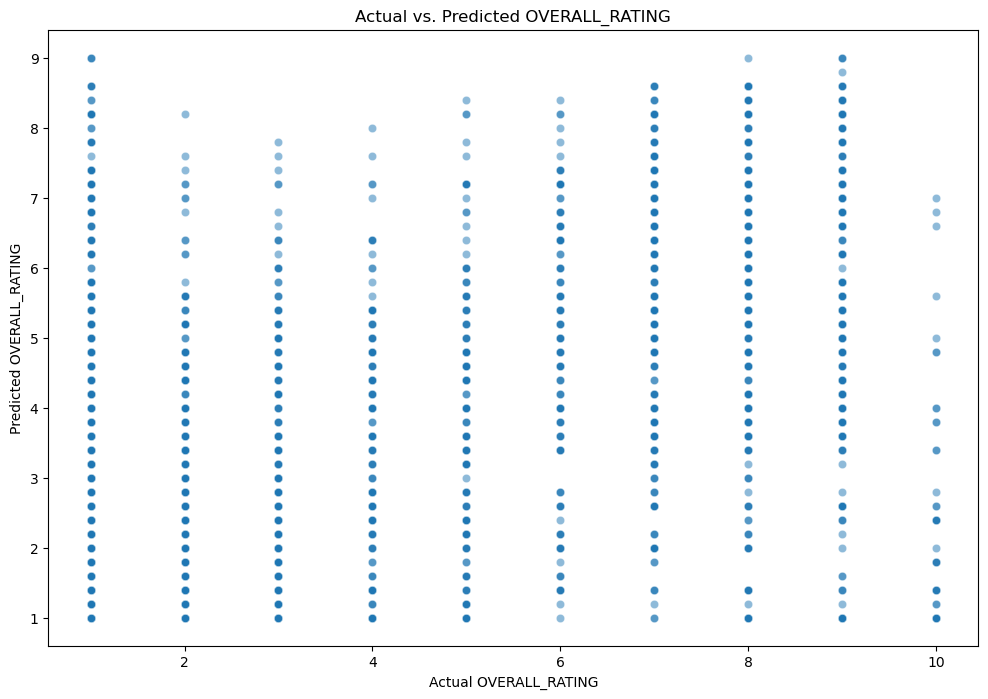

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Select relevant features and target variable
X = airline_df[['SEAT_COMFORT', 'CABIN_STAFF_SERVICE', 'FOOD_&_BEVERAGES', 'GROUND_SERVICE', 'INFLIGHT_ENTERTAINMENT']]
y = airline_df['OVERALL_RATING']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-NN regressor
knn_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Printing evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared: {r2:.2f}')


# Print both actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df)

# Scatter plot without line of equality
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Actual', y='Predicted', data=result_df, alpha=0.5)
plt.title('Actual vs. Predicted OVERALL_RATING')
plt.xlabel('Actual OVERALL_RATING')
plt.ylabel('Predicted OVERALL_RATING')
plt.show()
